In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load dataset and create relevant dataframe
data = pd.read_csv('premier-player-23-24.csv')
relevant_columns = ['Player', 'NewPos', 'MP', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'Age', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']
rdf = data[relevant_columns] #usable dataframe
ddf = data[relevant_columns] #relevant dataframe copy
rdf.head()

,Player,NewPos,MP,Gls,Ast,G+A,xG,xAG,Age,CrdY,CrdR,PrgC,PrgP,PrgR
0,Rodri,MF,34,8,9,17,4.1,3.9,27,8,1,76,376,55
1,Phil Foden,FW,35,19,8,27,10.3,8.4,23,2,0,93,168,269
2,Ederson,GK,33,0,0,0,0.0,0.1,29,5,0,0,4,0
3,Julián Álvarez,MF,36,11,8,19,13.0,6.4,23,2,0,64,103,180
4,Kyle Walker,DF,32,0,4,4,0.4,2.6,33,2,0,74,157,172


In [7]:
#Calculate Fantasy Points
def calculate_fantasy_points(row):
    # Initialize fantasy points to 0
    points = 0

    # Add points for goals
    points += row['Gls'] * 5  # 5 points per goal

    # Add points for assists
    points += row['Ast'] * 3  # 3 points per assist

    # Add points for expected goals (xG) and expected assists (xAG)
    points += row['xG'] * 2  # 2 points for each expected goal
    points += row['xAG'] * 1  # 1 point for each expected assist

    # Add points for minutes played (MP)
    points += (row['MP'] / 90) * 1  # 1 point per 90 minutes played

    # Subtract points for age (subtract 0.1 points for each year above 30)
    if row['Age'] > 30:
        points -= (row['Age'] - 30) * 0.1  # Penalize older players

    # Penalize for yellow and red cards
    points -= row['CrdY'] * 1  # -1 point per yellow card
    points -= row['CrdR'] * 3  # -3 points per red card

    # Add points for progressive actions (carries, passes, runs)
    points += row['PrgC'] * 0.5  # 0.5 points per progressive carry
    points += row['PrgP'] * 0.5  # 0.5 points per progressive pass
    points += row['PrgR'] * 0.5  # 0.5 points per progressive run

    return points

rdf['FantasyPoints'] = rdf.apply(calculate_fantasy_points, axis=1)
rdf.head()

C:\Users\ashwin\AppData\Local\Temp\ipykernel_19220\2359498151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['FantasyPoints'] = rdf.apply(calculate_fantasy_points, axis=1)


,Player,NewPos,MP,Gls,Ast,G+A,xG,xAG,Age,CrdY,CrdR,PrgC,PrgP,PrgR,FantasyPoints
0,Rodri,MF,34,8,9,17,4.1,3.9,27,8,1,76,376,55,321.977778
1,Phil Foden,FW,35,19,8,27,10.3,8.4,23,2,0,93,168,269,411.388889
2,Ederson,GK,33,0,0,0,0.0,0.1,29,5,0,0,4,0,-2.533333
3,Julián Álvarez,MF,36,11,8,19,13.0,6.4,23,2,0,64,103,180,283.300000
4,Kyle Walker,DF,32,0,4,4,0.4,2.6,33,2,0,74,157,172,214.955556


In [8]:
# Filter players by position
forwards = rdf[rdf['NewPos'] == 'FW']
midfielders = rdf[rdf['NewPos'] == 'MF']
defenders = rdf[rdf['NewPos'] == 'DF']
goalkeepers = rdf[rdf['NewPos'] == 'GK']


forwards[['Player', 'FantasyPoints']].head()


,Player,FantasyPoints
1,Phil Foden,411.388889
6,Erling Haaland,305.544444
11,Jeremy Doku,330.922222
15,Jack Grealish,160.422222
19,Oscar Bobb,50.155556


In [9]:
def calculate_player_cost(row):
    # Define the base cost for each position
    position_base_cost = {
        'FW': 12,  # Forwards
        'MF': 10,  # Midfielders
        'DF': 8,   # Defenders
        'GK': 6    # Goalkeepers
    }

    # Get the base cost based on the player's position
    base_cost = position_base_cost.get(row['NewPos'], 8)  # Default to 8 if position not found

    # Calculate the total of xG and xAG
    performance_goals_points = row['xG']
    performance_assists_points = row['xAG']

    # Define the multiplier for performance (can be adjusted based on league rules)
    performance_multiplier_goals = 1  # Example multiplier
    performance_multiplier_assists = 0.5
    
    # Calculate total cost
    total_cost = base_cost + (performance_goals_points * performance_multiplier_goals) + (performance_assists_points * performance_multiplier_assists)
    
    return total_cost

# Apply the function to calculate player costs and create a new column in the DataFrame
rdf['PlayerCost'] = rdf.apply(calculate_player_cost, axis=1)

# Show the updated DataFrame
rdf[['Player', 'NewPos', 'xG', 'xAG', 'PlayerCost']].head(10)


C:\Users\ashwin\AppData\Local\Temp\ipykernel_19220\552297783.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['PlayerCost'] = rdf.apply(calculate_player_cost, axis=1)


,Player,NewPos,xG,xAG,PlayerCost
0,Rodri,MF,4.1,3.9,16.05
1,Phil Foden,FW,10.3,8.4,26.50
2,Ederson,GK,0.0,0.1,6.05
3,Julián Álvarez,MF,13.0,6.4,26.20
4,Kyle Walker,DF,0.4,2.6,9.70
5,Bernardo Silva,MF,3.7,7.6,17.50
6,Erling Haaland,FW,29.2,4.3,43.35
7,Rúben Dias,DF,1.4,0.3,9.55
8,Manuel Akanji,DF,1.9,0.5,10.15
9,Joško Gvardiol,DF,3.1,1.4,11.80


In [10]:
rdf.head()

,Player,NewPos,MP,Gls,Ast,G+A,xG,xAG,Age,CrdY,CrdR,PrgC,PrgP,PrgR,FantasyPoints,PlayerCost
0,Rodri,MF,34,8,9,17,4.1,3.9,27,8,1,76,376,55,321.977778,16.05
1,Phil Foden,FW,35,19,8,27,10.3,8.4,23,2,0,93,168,269,411.388889,26.50
2,Ederson,GK,33,0,0,0,0.0,0.1,29,5,0,0,4,0,-2.533333,6.05
3,Julián Álvarez,MF,36,11,8,19,13.0,6.4,23,2,0,64,103,180,283.300000,26.20
4,Kyle Walker,DF,32,0,4,4,0.4,2.6,33,2,0,74,157,172,214.955556,9.70


In [11]:
rdf.to_csv('newpldata.csv')

In [12]:
import pandas as pd

def select_fantasy_team(rdf, budget=200):
    # Step 1: Sort players by cost efficiency (Fantasy Points / Player Cost)
    rdf["CostEfficiency"] = rdf["FantasyPoints"] / rdf["PlayerCost"]
    
    # Step 2: Filter by position
    gks = rdf[rdf["NewPos"] == "GK"].sort_values(by="CostEfficiency", ascending=False)
    dfs = rdf[rdf["NewPos"] == "DF"].sort_values(by="CostEfficiency", ascending=False)
    mfs = rdf[rdf["NewPos"] == "MF"].sort_values(by="CostEfficiency", ascending=False)
    fws = rdf[rdf["NewPos"] == "FW"].sort_values(by="CostEfficiency", ascending=False)

    # Step 3: Select best cost-efficient players
    team = []
    team.append(gks.iloc[0].to_dict())  # 1 Goalkeeper
    team += list(dfs.iloc[:4].to_dict(orient="records"))  # 4 Defenders
    team += list(mfs.iloc[:3].to_dict(orient="records"))  # 3 Midfielders
    team += list(fws.iloc[:3].to_dict(orient="records"))  # 3 Forwards

    # Step 4: Check budget
    total_cost = sum(player["PlayerCost"] for player in team)
    while total_cost > budget:
        # Find the least cost-efficient player to replace
        worst_player = min(team, key=lambda p: p["CostEfficiency"])
        pos = worst_player["NewPos"]
        
        # Find a cheaper replacement
        replacement = rdf[(rdf["NewPos"] == pos) & (rdf["PlayerCost"] < worst_player["PlayerCost"])].sort_values(by="CostEfficiency", ascending=False)
        
        if not replacement.empty:
            new_player = replacement.iloc[0].to_dict()
            team.remove(worst_player)
            team.append(new_player)
            total_cost = sum(player["PlayerCost"] for player in team)
        else:
            break  # If no valid replacement, stop

    # Convert the final team to a DataFrame with only relevant columns
    team_df = pd.DataFrame(team)[["Player", "NewPos", "FantasyPoints", "PlayerCost"]]
    return team_df

# Run the function
selected_team = select_fantasy_team(rdf)
selected_team


C:\Users\ashwin\AppData\Local\Temp\ipykernel_19220\2005860350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf["CostEfficiency"] = rdf["FantasyPoints"] / rdf["PlayerCost"]


,Player,NewPos,FantasyPoints,PlayerCost
0,Mark Flekken,GK,3.411111,6.25
1,Kyle Walker,DF,214.955556,9.70
2,Antonee Robinson,DF,229.011111,10.80
3,Ben White,DF,229.611111,11.10
4,Nélson Semedo,DF,190.200000,10.15
5,Bernardo Silva,MF,352.866667,17.50
6,Rodri,MF,321.977778,16.05
7,Martin Ødegaard,MF,411.288889,22.20
8,Jeremy Doku,FW,330.922222,16.80
9,Dejan Kulusevski,FW,401.000000,20.55


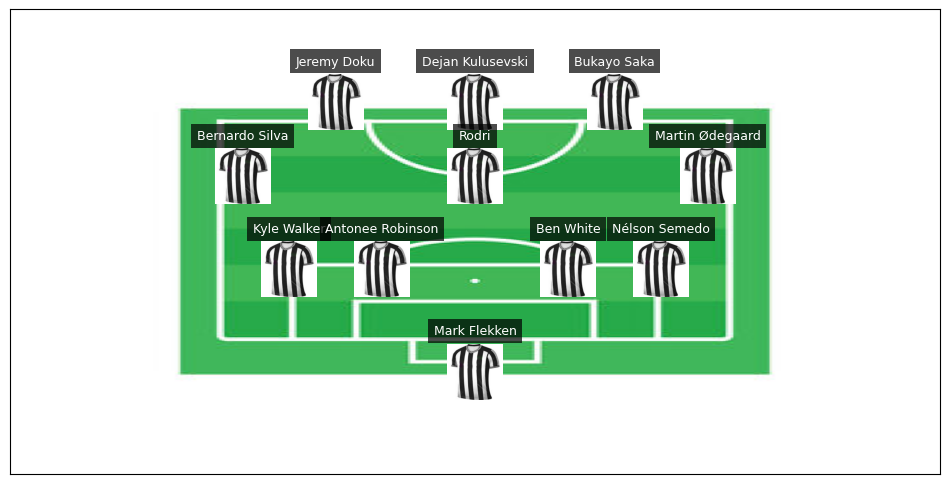

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_fantasy_team(selected_team):
    # Load the pitch and kit images
    pitch_img = mpimg.imread('football_half.jpg')
    kit_img = mpimg.imread('kit.jpeg')

    # Set up figure and axes
    fig, ax = plt.subplots(figsize=(12, 11))  # Adjust figure size
    ax.set_xlim(0, 100)  # Full width of the half-pitch
    ax.set_ylim(0, 50)  # Full height of the half-pitch

    # Display the pitch image (Ensure it's visible)
    ax.imshow(pitch_img, extent=[0, 100, 0, 50], zorder=0)

    # Define positions for players (x, y coordinates)
    positions = {
        "GK": (50, 11),  # Goalkeeper near the goal line
        "DF1": (30, 22), "DF2": (40, 22), "DF3": (60, 22), "DF4": (70, 22),  # Defenders in front of GK
        "MF1": (25, 32), "MF2": (50, 32), "MF3": (75, 32),  # Midfielders in central area
        "FW1": (35, 40), "FW2": (50, 40), "FW3": (65, 40)  # Forwards near the center circle
    }

    # Assign players to positions from the DataFrame
    players = {pos: name for pos, name in zip(positions.keys(), selected_team["Player"])}

    # Overlay jerseys and player names
    for pos, (x, y) in positions.items():
        player_name = players.get(pos, "Unknown")  # Default to "Unknown" if missing

        # Display player kit (smaller and well-spaced)
        ax.imshow(kit_img, extent=[x-3, x+3, y-3, y+3], zorder=1)  # Adjust kit size

        # Add player name above kit
        ax.text(x, y+4, player_name, fontsize=9, color="white", ha="center",
                bbox=dict(facecolor="black", alpha=0.7, edgecolor="none"))

    # Hide axes for a clean look
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Call function with selected team
plot_fantasy_team(selected_team)


### I. EDA
1. Compute summary statistics (mean, median, standard deviation) for key variables (e.g., xG, xAG, PlayerCost).
2. Create histograms and box plots for distributions of these variables.

               xG         xAG  PlayerCost
count  580.000000  580.000000  580.000000
mean     2.076034    1.493793   12.402241
std      3.402254    2.115351    5.234085
min      0.000000    0.000000    6.000000
25%      0.100000    0.100000    9.100000
50%      0.800000    0.700000   10.850000
75%      2.500000    2.000000   14.000000
max     29.200000   11.800000   43.350000


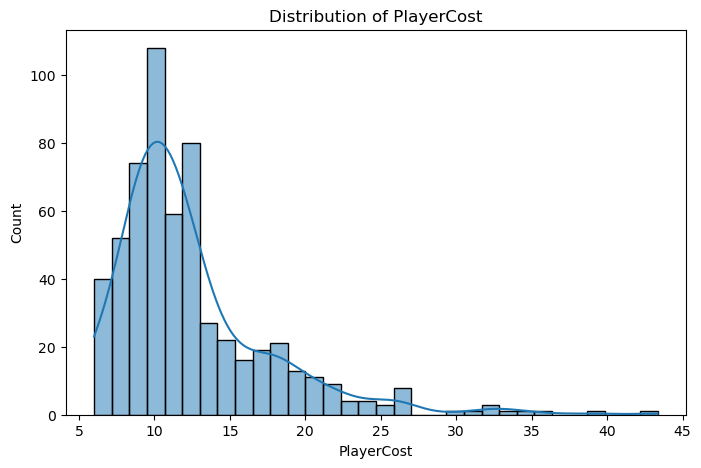

In [20]:
# Summary statistics
print(rdf[['xG', 'xAG', 'PlayerCost']].describe())

# Histogram for PlayerCost
plt.figure(figsize=(8, 5))
sns.histplot(rdf['PlayerCost'], kde=True)
plt.title('Distribution of PlayerCost')
plt.xlabel('PlayerCost')
plt.show()


### II. Visualization of Relationships
1. Create scatter plots to see how xG and xAG relate to PlayerCost.
2. Use color coding or facet grids to distinguish between player positions.

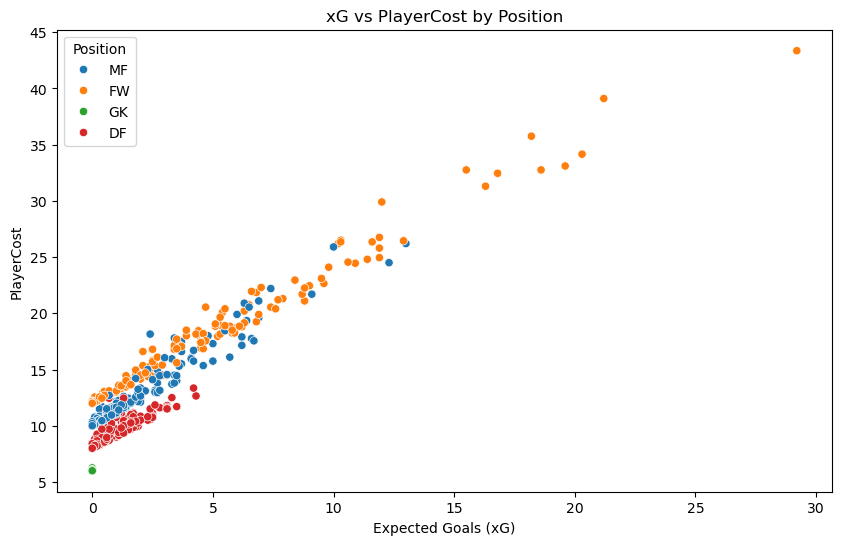

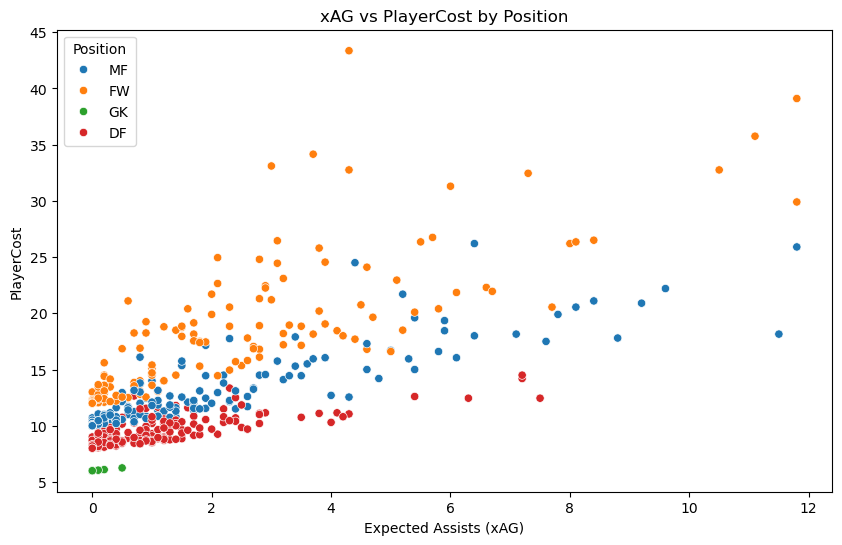

In [16]:
# New Cell: Visualizing Relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xG', y='PlayerCost', hue='NewPos', data=rdf)
plt.title('xG vs PlayerCost by Position')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('PlayerCost')
plt.legend(title='Position')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='xAG', y='PlayerCost', hue='NewPos', data=rdf)
plt.title('xAG vs PlayerCost by Position')
plt.xlabel('Expected Assists (xAG)')
plt.ylabel('PlayerCost')
plt.legend(title='Position')
plt.show()


### III. Enhanced Cost Calculation with Additional Metrics
1. Identify additional columns (e.g., minutes played, shots on target).
2. Create a new function cell that adds these factors to the cost.

In [18]:
# New Cell: Extended Cost Calculation (example)
def calculate_player_cost_extended(row):
    # Base cost remains the same
    position_base_cost = {
        'FW': 12,
        'MF': 10,
        'DF': 8,
        'GK': 6
    }
    base_cost = position_base_cost.get(row['NewPos'], 8)
    
    # Existing performance metrics
    performance_goals_points = row['xG']
    performance_assists_points = row['xAG']
    
    # Additional metric: For example, if 'Minutes' is a column in your dataset
    minutes_played = row.get('Minutes', 90)  # Default value if missing
    
    # New multipliers for additional metric (tweak as needed)
    minutes_multiplier = 0.01  # Example value
    
    total_cost = base_cost + performance_goals_points + (performance_assists_points * 0.5) + (minutes_played * minutes_multiplier)
    return total_cost

# Optionally, apply and check the new cost (keeping the old one intact)
rdf['ExtendedPlayerCost'] = rdf.apply(calculate_player_cost_extended, axis=1)
rdf[['Player', 'NewPos', 'xG', 'xAG', 'ExtendedPlayerCost']].head(10)


C:\Users\ashwin\AppData\Local\Temp\ipykernel_19220\1440146759.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['ExtendedPlayerCost'] = rdf.apply(calculate_player_cost_extended, axis=1)


,Player,NewPos,xG,xAG,ExtendedPlayerCost
0,Rodri,MF,4.1,3.9,16.95
1,Phil Foden,FW,10.3,8.4,27.40
2,Ederson,GK,0.0,0.1,6.95
3,Julián Álvarez,MF,13.0,6.4,27.10
4,Kyle Walker,DF,0.4,2.6,10.60
5,Bernardo Silva,MF,3.7,7.6,18.40
6,Erling Haaland,FW,29.2,4.3,44.25
7,Rúben Dias,DF,1.4,0.3,10.45
8,Manuel Akanji,DF,1.9,0.5,11.05
9,Joško Gvardiol,DF,3.1,1.4,12.70


### IV. Predictive Modeling with Machine Learning
https://chatgpt.com/c/67c5ac2e-509c-800a-80b6-8d7f18f50c11